# CNN [500]

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

In [3]:
""" Load CIFAR-10 dataset """
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
""" Normalize pixel values """
train_images = train_images / 255.0
test_images = test_images / 255.0

In [40]:
""" Data augmentation """
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

num = 10000

augmented_data = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(train_images, train_labels, batch_size=num):
    augmented_data.extend(x_batch)
    augmented_labels.extend(y_batch)
    if len(augmented_data) >= num:
        break

x_train_concat = np.concatenate((train_images, augmented_data[:len(train_images)]))
y_train_concat = np.concatenate((train_labels, augmented_labels[:len(train_labels)]))

shuffle_idx = np.random.permutation(len(x_train_concat))
x_train_concat = x_train_concat[shuffle_idx]
y_train_concat = y_train_concat[shuffle_idx]

print(x_train_concat.shape, '|', y_train_concat.shape)

(60000, 32, 32, 3) | (60000, 1)


In [42]:
""" Construct the CNN model """
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

""" Compile the model """
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
""" Early stopping callback """
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [44]:
""" Train the model """
history = model.fit(
    x_train_concat,
    y_train_concat,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
  )

Epoch 1/15
750/750 [==============================] - 10s 13ms/step - loss: 1.6478 - accuracy: 0.3936 - val_loss: 1.3861 - val_accuracy: 0.5028
Epoch 2/15
750/750 [==============================] - 9s 12ms/step - loss: 1.3101 - accuracy: 0.5298 - val_loss: 1.2218 - val_accuracy: 0.5655
Epoch 3/15
750/750 [==============================] - 9s 12ms/step - loss: 1.1552 - accuracy: 0.5900 - val_loss: 1.0541 - val_accuracy: 0.6258
Epoch 4/15
750/750 [==============================] - 8s 11ms/step - loss: 1.0670 - accuracy: 0.6211 - val_loss: 1.0390 - val_accuracy: 0.6369
Epoch 5/15
750/750 [==============================] - 9s 11ms/step - loss: 1.0020 - accuracy: 0.6451 - val_loss: 0.9445 - val_accuracy: 0.6702
Epoch 6/15
750/750 [==============================] - 9s 12ms/step - loss: 0.9430 - accuracy: 0.6699 - val_loss: 0.9545 - val_accuracy: 0.6634
Epoch 7/15
750/750 [==============================] - 9s 11ms/step - loss: 0.8978 - accuracy: 0.6836 - val_loss: 0.9090 - val_accuracy: 0.683

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [46]:
""" Evaluate the model on the test set """
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8281 - accuracy: 0.7192
Test loss: 0.8280916810035706
Test accuracy: 0.7192000150680542


In [47]:
""" Classes Dictionary """
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

(32, 32, 3)


Text(0.5, 1.0, 'class_number: 5 | class_name: dog')

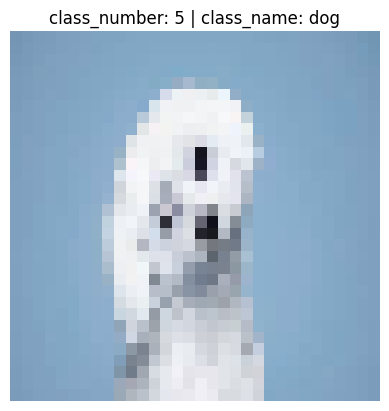

In [48]:
""" Load a test image for predict """
import cv2

test_img = cv2.imread('dog.jpeg')
test_img = cv2.resize(test_img, (32, 32))

print(test_img.shape)
plt.imshow(test_img, 'Greys')
plt.axis('off')
plt.title("class_number: 5 | class_name: dog")

In [50]:
""" Prediction step """
test_img = test_img.reshape(-1, 32, 32, 3)
predicted_class = np.argmax(model.predict(test_img), axis=1)
print('predicted_class_number:', predicted_class)
print('predicted_class_name:', f'[{classes.get(predicted_class[0])}]')


1/1 [==============================] - 0s 76ms/step
predicted_class_number: [5]
predicted_class_name: [dog]


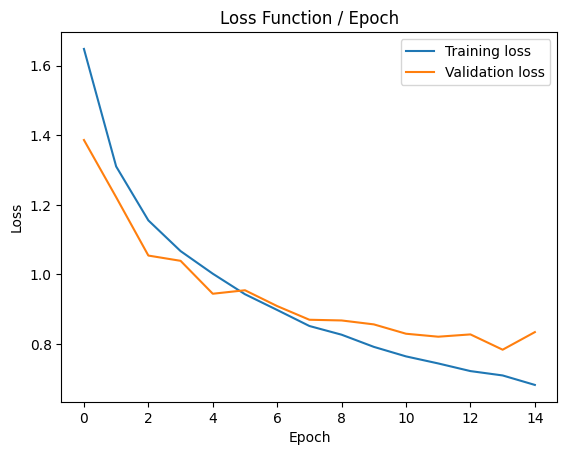

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [51]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Function / Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

model.summary()

## THNAK YOU --- \\(^o^)/